In [1]:
# get 30 ICs 
import nipype.interfaces.io as nio
PD_ICA_file='/templateflow/PD_ICAs';
ICs_list=list(range(30))
ICs_list=["{:0>4d}".format(x) for x in ICs_list]
# file import
ds_ic = nio.DataGrabber(infields=['IC_id'])
ds_ic.inputs.base_directory = PD_ICA_file # database
ds_ic.inputs.template = 'melodic_IC_%4s.nii.gz' # from cwd
ds_ic.inputs.sort_filelist = True
ds_ic.inputs.IC_id = ICs_list
res_ic = ds_ic.run()
ic_list=res_ic.outputs.outfiles
#print(t1_list)
# read study groups 
#PD_LIST='/codes/PD_template_subjects.list';
GROUPS=['PD','ET','NC']

for group_name in GROUPS:
    current_group='PD'
    SUB_LIST = '/codes/devel/PD_Marker/'+current_group+'_anat_ICA.list'
    
    current_OUT_DIR=OUT_DIR+current_group+'/'
    if not os.path.exists(current_OUT_DIR):
        os.makedirs(current_OUT_DIR)
    
    with open(SUB_LIST, 'r') as f_sub:
        sub_list = f_sub.readlines()
    sub_list = [x[0:-1] for x in sub_list] # remove \n
    N_sub=len(sub_list)
    print(N_sub, sub_list)
    DATA_DIR='/data/'+current_group
    

48 ['sub-0002', 'sub-0004', 'sub-0005', 'sub-0006', 'sub-0008', 'sub-0012', 'sub-0014', 'sub-0015', 'sub-0018', 'sub-0020', 'sub-0021', 'sub-0022', 'sub-0023', 'sub-0024', 'sub-0025', 'sub-0026', 'sub-0027', 'sub-0028', 'sub-0029', 'sub-0030', 'sub-0031', 'sub-0034', 'sub-0035', 'sub-0037', 'sub-0038', 'sub-0040', 'sub-0047', 'sub-0051', 'sub-0052', 'sub-0068', 'sub-0075', 'sub-0076', 'sub-0087', 'sub-0094', 'sub-0096', 'sub-0098', 'sub-0103', 'sub-0111', 'sub-0118', 'sub-0125', 'sub-0126', 'sub-0129', 'sub-0131', 'sub-0132', 'sub-0133', 'sub-0136', 'sub-1000', 'sub-1020']
34 ['sub-0039', 'sub-0041', 'sub-0042', 'sub-0043', 'sub-0044', 'sub-0053', 'sub-0057', 'sub-0058', 'sub-0060', 'sub-0062', 'sub-0064', 'sub-0066', 'sub-0067', 'sub-0071', 'sub-0072', 'sub-0077', 'sub-0078', 'sub-0079', 'sub-0080', 'sub-0082', 'sub-0083', 'sub-0085', 'sub-0100', 'sub-0102', 'sub-0104', 'sub-0107', 'sub-0108', 'sub-0110', 'sub-0113', 'sub-0117', 'sub-0121', 'sub-0124', 'sub-0128', 'sub-0130']


In [ ]:

current_group='HC'
PD_LIST = '/codes/PD_ICA.list'
NC_LIST = '/codes/HC_ICA.list'
with open(PD_LIST, 'r') as f_sub:
    pd_list = f_sub.readlines()
pd_list = [x[0:-1] for x in pd_list] # remove \n
with open(NC_LIST, 'r') as f_sub:
    nc_list = f_sub.readlines()
nc_list = [x[0:-1] for x in nc_list]
print(len(pd_list), pd_list)
print(len(nc_list), nc_list)
NC_dir='/output/sMRI/HC-Jacobian'
PD_dir='/output/sMRI/PD_Jacobian'
# file import
ds_pd_jacobian = nio.DataGrabber(infields=['sub_id'])
ds_pd_jacobian.inputs.base_directory = PD_dir # database
ds_pd_jacobian.inputs.template = '%s_desc-preproc_T1w_space-MNI2009c_Warp_Jacobian.nii.gz' # from cwd
ds_pd_jacobian.inputs.sort_filelist = True
ds_pd_jacobian.inputs.sub_id = pd_list
res_pd_jacobian = ds_pd_jacobian.run()
pd_jacobian_list=res_pd_jacobian.outputs.outfiles
#print(len(pd_jacobian_list), pd_jacobian_list)
#
ds_nc_jacobian = nio.DataGrabber(infields=['sub_id'])
ds_nc_jacobian.inputs.base_directory = NC_dir # database
ds_nc_jacobian.inputs.template = '%s_desc-preproc_T1w_space-MNI2009c_Warp_Jacobian.nii.gz' # from cwd
ds_nc_jacobian.inputs.sort_filelist = True
ds_nc_jacobian.inputs.sub_id = nc_list
res_nc_jacobian = ds_nc_jacobian.run()
nc_jacobian_list=res_nc_jacobian.outputs.outfiles
#print(len(nc_jacobian_list), nc_jacobian_list)

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
from nilearn import plotting
def plot_ic(ic_img, pd_img, nc_img):
    import nibabel as nib
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    data = img.get_fdata()
    data1 = img1.get_fdata()
    data2 = img2.get_fdata()
    #X = stats.zscore(np.asarray(data))
    nz_pos=np.flatnonzero(data)
    IC_val=data.ravel()[nz_pos]
    pd_val=stats.zscore(data1.ravel()[nz_pos])
    nc_val=stats.zscore(data2.ravel()[nz_pos])
    print(len(IC_val)*.1/len(data.flatten())); print(len(pd_val),len(pd_val))
    print(len(nc_val),len(nc_val))
    Y_ULIM=5000; N_BINs=500;
    fig, ax = plt.subplots(1,3, figsize=[9, 3])
    ax[0].hist(IC_val, bins=N_BINs)
    ax[0].set_ylim([0,Y_ULIM])
    ax[0].set_xlim([-5,5])
    ax[0].set_title('ICA number: {}'.format(i_IC), color='r')

    ax[1].hist(pd_val, bins=N_BINs)
    ax[1].set_ylim([0,Y_ULIM])
    ax[1].set_xlim([-5,5])
    ax[1].set_title('ICA number: {} of PD {}'.format(i_IC,i_sub), color='r')

    ax[2].hist(nc_val, bins=N_BINs)
    ax[2].set_ylim([0,Y_ULIM])
    ax[2].set_xlim([-5,5])
    ax[2].set_title('ICA number: {} of NC {}'.format(i_IC,i_sub), color='r')

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()
#
pd_list=pd_jacobian_list; nc_list=nc_jacobian_list;

i_IC=0; i_sub=0
ic_img = nib.load(ic_list[i_IC]);   
pd_img = nib.load(pd_list[i_sub]); 
nc_img = nib.load(nc_list[i_sub])
plot_ic(ic_img, pd_img, nc_img)
plot_ic(ic_img, pd_img, nc_img)

(<nibabel.nifti1.Nifti1Image at 0x7f6f746d3f60>,
 <nibabel.nifti1.Nifti1Image at 0x7f6f77182f60>)

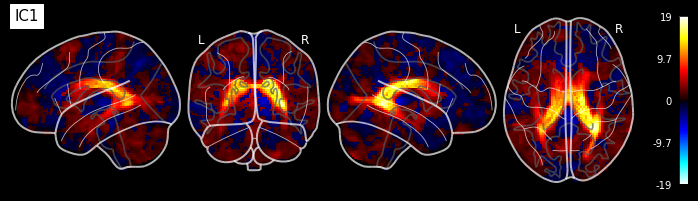

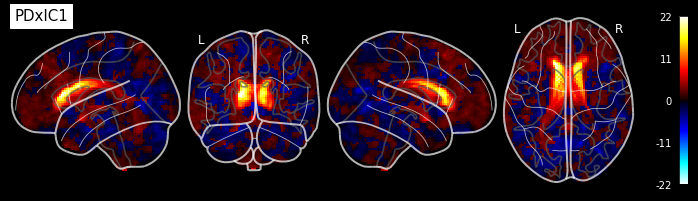

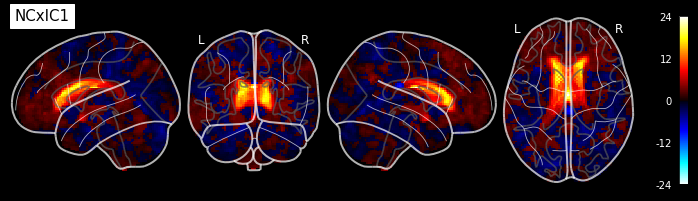

In [86]:
#cross product prediction
#%%time
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn.image import resample_to_img
from nilearn.image import math_img

def plt_xIC(ic_img, pd_img, nc_img, TH, i_IC): 
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    import nibabel as nib
    from nilearn.image import resample_to_img
    from nilearn import plotting

    resampled_data1_img = resample_to_img(pd_img, ic_img)
    resampled_data2_img = resample_to_img(nc_img, ic_img)
    result_img1 = math_img("img1 * img2", img1=img, img2=resampled_data1_img)
    result_img2 = math_img("img1 * img2", img1=img, img2=resampled_data2_img)
    plotting.plot_glass_brain(ic_img, title='IC'+str(i_IC+1), display_mode='lyrz',
                              black_bg=True, colorbar=True, plot_abs=False,threshold=TH)
    plotting.plot_glass_brain(result_img1, title='PDxIC'+str(i_IC+1), display_mode='lyrz',
                              black_bg=True, colorbar=True, plot_abs=False,threshold=TH)
    plotting.plot_glass_brain(result_img2, title='NCxIC'+str(i_IC+1), display_mode='lyrz',
                              black_bg=True, colorbar=True, plot_abs=False,threshold=TH)
    return result_img1, result_img2
i_IC=0; i_sub=0; TH=0
ic_img = nib.load(ic_list[i_IC]);   
pd_img = nib.load(pd_list[i_sub]); 
nc_img = nib.load(nc_list[i_sub]);
#resampled_data1_img = resample_to_img(pd_img, ic_img)
#resampled_data2_img = resample_to_img(nc_img, ic_img)
plt_xIC(ic_img, pd_img, nc_img, TH, i_IC)

In [72]:
i_IC=0; i_sub=0; TH=0
ic_img = nib.load(ic_list[i_IC]);   
pd_img = nib.load(pd_list[i_sub]); 
nc_img = nib.load(nc_list[i_sub]);
#resampled_data1_img = resample_to_img(pd_img, ic_img)
#resampled_data2_img = resample_to_img(nc_img, ic_img)

def get_imageData(img_str, img_ic):
    import numpy as np
    import nibabel as nib
    from nilearn.image import resample_to_img
    img = nib.load(img_str);
    resampled_img = resample_to_img(img, ic_img)
    data_ic = ic_img.get_fdata()
    data = resampled_img.get_fdata()
    nz_pos=np.flatnonzero(data_ic)
    IC_val=data_ic.ravel()[nz_pos]
    img_val=stats.zscore(data.ravel()[nz_pos])
    return [data, IC_val, img_val]

pd_data = [get_image(x,ic_img) for x in pd_list]
nc_data = [get_image(x,ic_img) for x in nc_list]
print(np.sum(pd_data[0][0]))
print(np.sum(pd_data[1][0]))

1060051.450135765
1059669.8242368363


In [77]:
from scipy import stats
pd_mean=[np.mean(x[0]) for x in pd_data]
nc_mean=[np.mean(x[0]) for x in nc_data]
print(stats.ttest_ind(pd_mean, nc_mean, equal_var=True))
print(stats.ttest_ind(pd_mean, nc_mean, equal_var=False))

Ttest_indResult(statistic=-1.3711034291991173, pvalue=0.17417680771735503)
Ttest_indResult(statistic=-1.206577160233266, pvalue=0.23464457921760362)


In [81]:
i_IC=0; i_sub=0; TH=0
ic_img = nib.load(ic_list[i_IC]);   
pd_img = nib.load(pd_list[i_sub]); 
nc_img = nib.load(nc_list[i_sub]);
def get_xImageData(img_str, img_ic):
    import numpy as np
    import nibabel as nib
    from nilearn.image import resample_to_img
    img = nib.load(img_str);
    resampled_img = resample_to_img(img, ic_img)
    x_img = math_img("img1 * img2", img1=img_ic, img2=resampled_img)
    data_ic = ic_img.get_fdata()
    data = x_img.get_fdata()
    return data
xpd_data = [get_xImageData(x,ic_img) for x in pd_list]
xnc_data = [get_xImageData(x,ic_img) for x in nc_list]

ValueError: operands could not be broadcast together with shapes (101,119,97) (235818,) 

In [84]:
xpd_mean=[np.mean(x) for x in xpd_data]
xnc_mean=[np.mean(x) for x in xnc_data]
print(stats.ttest_ind(xpd_mean, xnc_mean, equal_var=True))
print(stats.ttest_ind(xpd_mean, xnc_mean, equal_var=False))

Ttest_indResult(statistic=-2.611701552984461, pvalue=0.010755738938827877)
Ttest_indResult(statistic=-2.5044536648945304, pvalue=0.015007318082083668)


In [87]:
xpd_var=[np.var(x) for x in xpd_data]
xnc_var=[np.var(x) for x in xnc_data]
print(stats.ttest_ind(xpd_var, xnc_var, equal_var=True))
print(stats.ttest_ind(xpd_var, xnc_var, equal_var=False))

Ttest_indResult(statistic=-1.8994027071264423, pvalue=0.06111577484793034)
Ttest_indResult(statistic=-1.8138974536096693, pvalue=0.07480459323692994)
